In [ ]:
%matplotlib                    # Pyplot 그래프 새창에서 열기 옵션

In [ ]:
%matplotlib inline             # Pyplot 그래프 새창에서 열기 '취소' 옵션

In [2]:
pd.set_option('display.max_rows',    100)      # DataFrame 데이터 확인 시 최대 표시 행 수
pd.set_option('display.max_columns', 100)      # DataFrame 데이터 확인 시 최대 표시 열 수

## 라이브러리 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

PCA 라이브러리

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

.

.

.



## 데이터 불러오기

특징값 데이터 불러와서 정상/고장 분리

In [4]:
FeatureData = pd.read_csv('./ProcessedData/FeatureData', sep=',', header=None)
FeatureData.shape

(270, 360)

P value 순위 데이터 불러오기

In [5]:
P_value_Rank = pd.read_csv('./ProcessedData/P_value_Rank' , sep=',' , header=None)
P_value_Rank

,0,1
0,198.0,4.762393e-81
1,110.0,5.270311e-77
2,170.0,4.615377e-76
3,134.0,5.747675e-74
4,133.0,7.585991e-74
...,...,...
265,85.0,8.999631e-01
266,95.0,9.358453e-01
267,255.0,9.450087e-01
268,217.0,9.695416e-01


## P value 기준 차원축소 대상 데이터(Feature data) 선정

In [6]:
# StartRank 부터 Number 만큼의 Feature
StartRank = 1
Number    = 30

SelectedFeatues = np.zeros((Number, FeatureData.shape[1]))

s = 0

for i in range(StartRank, StartRank+Number):
    
    index                 = int(P_value_Rank.iloc[i-1,0])
    SelectedFeatues[s,:]  = FeatureData.iloc[index,:].values
    s += 1

# 정상, 고장 특징값 합치기    
FeatureSelected = pd.DataFrame(SelectedFeatues)
FeatureSelected.shape

(30, 360)

In [7]:
FeatureSelected = np.transpose(FeatureSelected)
FeatureSelected.shape

(360, 30)

.

.

.



## 데이터 정규화

In [8]:
# 선정된 특징데이터에 대한 정규화
FeatureSelected_std = StandardScaler().fit_transform(FeatureSelected)
FeatureSelected_std.shape

(360, 30)

## 선정된 Feature PCA

In [9]:
# 10개 PC(Principal Component) 추출
pca = PCA(n_components = 10)
PC  = pca.fit_transform(FeatureSelected_std)

# 설명된 분산의 비율
VarRatio = pca.explained_variance_ratio_
VarRatio = pd.DataFrame(np.round_(VarRatio,3))  # 소수점 3자리 반올림

# 설명된 분산의 비율 누적
CumVarRatio    = np.cumsum(pca.explained_variance_ratio_)
CumVarRatio_df = pd.DataFrame(np.round_(CumVarRatio,3))

Result = pd.concat([VarRatio  CumVarRatio_df], axis=1)
Result

,0,0
0,0.550,0.550
1,0.094,0.644
2,0.079,0.723
3,0.055,0.777
4,0.047,0.824
5,0.037,0.861
6,0.033,0.894
7,0.026,0.920
8,0.020,0.940
9,0.013,0.953


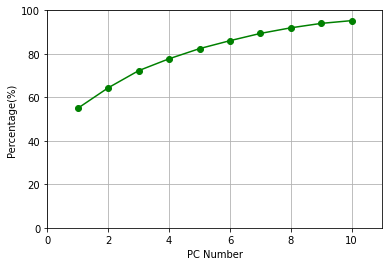

In [10]:
# 누적값 그래프로 시각화
plt.plot(range(1,11), CumVarRatio*100, color='green', linestyle='-', marker='o')
plt.ylim(0,100)
plt.xlim(0,11)
plt.grid()
plt.xlabel('PC Number')
plt.ylabel('Percentage(%)')
plt.show()

## Selected Feature PCA (2차원) 기반 분포 시각화

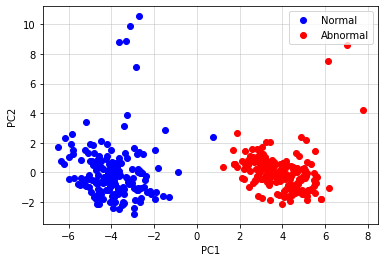

In [11]:
NoOfData = int(FeatureData.shape[1]/2)

plt.plot(PC[:NoOfData,0], PC[:NoOfData,1], color='b', linestyle='', marker='o', label='Normal')
plt.plot(PC[NoOfData:,0], PC[NoOfData:,1], color='r', linestyle='', marker='o', label='Abnormal')
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(alpha=0.5)
plt.show()